In [1]:
import sys
from pathlib import Path

In [810]:
# !{sys.executable} -m pip install -qe ..

In [3]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [42]:
from chequeparser.wrappers.results import DetectionResults
from chequeparser.utilities.ds_utils import concat_ds

In [43]:
from chequeparser.datasets.fileds import FileDS
from chequeparser.datasets.imageds import ImageDS

In [811]:
from chequeparser.models.arch import UL_RTDETR, DOCTR_CRNN_VGG16_PRETRAINED
from chequeparser.models.detection.ultralytics import UltralyticsDetect
from chequeparser.models.recognition.doctr import DoctrRecognize
from chequeparser.core.detector import detect
from chequeparser.core.recognizer import recognize

## config

In [842]:
dir_images = "../data/public/train/images/"

## test pkg

In [843]:
file_ds = FileDS(dir_images)

  0%|          | 0/369 [00:00<?, ?it/s]

2024-02-12 23:26:08.665 | INFO     | chequeparser.utilities.io_utils:get_image_files:30 - Found 369 image files.


In [844]:
model = UltralyticsDetect("../pretrained/best.pt", arch=UL_RTDETR)

In [845]:
len(file_ds)

369

In [866]:
sample_ds = file_ds.sample(batched=True)

5


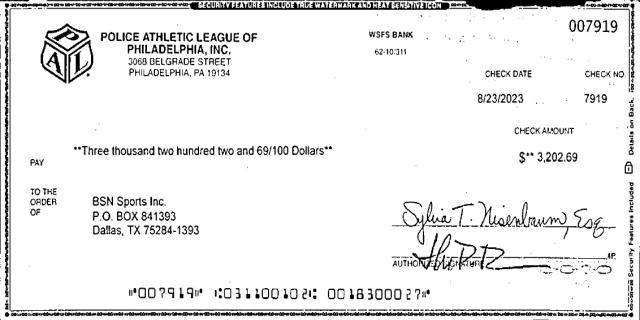

In [871]:
print(len(sample_ds))
sample_ds[4]

In [873]:
results = detect(model, sample_ds, stream=False)

Reloading 'chequeparser.core.detector'.


2024-02-12 23:27:41.013 | INFO     | chequeparser.core.detector:detect:36 - Stream mode: False
2024-02-12 23:27:41.014 | INFO     | chequeparser.core.detector:detect:37 - Batched mode: True
2024-02-12 23:27:41.015 | INFO     | chequeparser.core.detector:detect:38 - Running predict on 5 samples



0: 640x640 1 amnt, 1 date, 1 orderof, 1 payee, 1: 640x640 1 amnt, 1 date, 1 micr, 1 orderof, 1 payee, 2: 640x640 1 amnt, 1 chk_no, 1 date, 1 micr, 1 orderof, 1 payee, 3: 640x640 1 amnt, 1 date, 1 micr, 1 orderof, 1 payee, 4: 640x640 1 amnt, 1 chk_no, 1 date, 1 micr, 1 orderof, 1 payee, 92.2ms
Speed: 1.1ms preprocess, 18.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


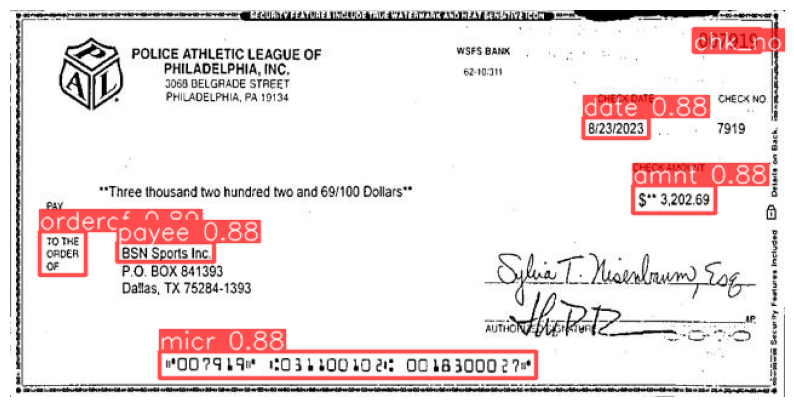

In [875]:
results[4].display(color=(255, 0, 0))

In [876]:
results_ds = concat_ds([result.create_ds() for result in results])

In [877]:
results_ds.parent_ds == sample_ds

True

### ocr

In [878]:
ocr_model = DoctrRecognize(arch=DOCTR_CRNN_VGG16_PRETRAINED)

In [879]:
ocr_results = recognize(ocr_model, results_ds, stream=False)

2024-02-12 23:28:21.228 | INFO     | chequeparser.core.recognizer:recognize:29 - Stream mode: False
2024-02-12 23:28:21.229 | INFO     | chequeparser.core.recognizer:recognize:30 - Batched mode: False
2024-02-12 23:28:21.230 | INFO     | chequeparser.core.recognizer:recognize:31 - Running predict on 26 samples


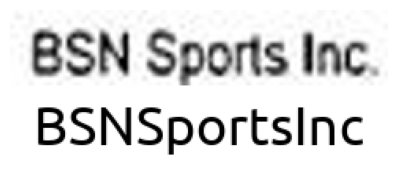

In [892]:
ocr_results[-1].display()

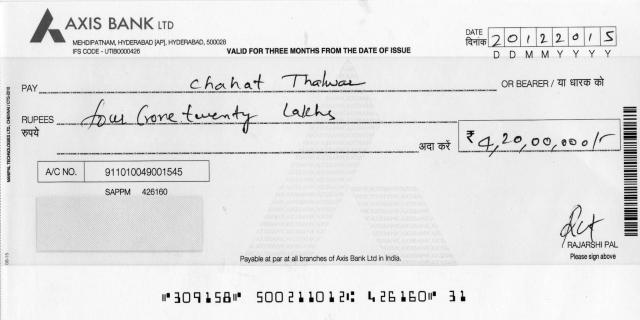

In [840]:
sample_ds[results_ds.l_parent_idx[ocr_results[6].parent_idx]]